# Aula 6 - Como limpar dados em Data Frames?

Nesta aula vamos continuar aprendendo a usar o [pandas](https://pandas.pydata.org/) para:
- Identificação de valores missings
- Identificação de valores atípicos
- Deletar informações de uma tabela

___
**PROBLEMA 1:**

Imagine que você está trabalhando com um conjunto de dados de vendas de seguros de saúde, porém, ele contém valores faltantes em várias colunas.

Seu objetivo é identificar e lidar com esses valores ausentes para realizar uma análise correta.

O que você deve fazer?

____

**PROBLEMA 2:**

Ao analisar dados de uma pesquisa de valores de plano de saúde, é necessário identificar os valores que fogem muito da média e podem ser considerados valores atípicos.

Como realizamos essa análise?

____

Para começarmos, vamos abrir o conjunto de dados na pasta *datasets* com o título **medical_insurance**.

Esse *dataset* é um conjunto modificado de um famoso *dataset* disponível no link [medical insurance](https://www.kaggle.com/datasets/mirichoi0218/insurance), no site do Kaggle.

In [1]:
import pandas as pd

In [2]:
df_insurance = pd.read_csv('../datasets/Medical_insurance.csv')

In [3]:
#Ver as informações
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
#Ver as idades
df_insurance['age'].value_counts()

age
18    148
19    142
47     62
52     62
45     62
23     62
46     60
54     60
51     60
28     60
21     60
22     60
26     60
25     58
50     58
27     58
20     58
53     58
48     58
49     56
44     56
41     56
24     56
32     56
30     56
56     56
39     54
33     54
42     54
40     54
43     54
31     54
57     54
29     54
37     52
59     52
58     52
34     52
55     52
35     50
36     50
38     50
62     48
60     46
64     46
63     46
61     46
Name: count, dtype: int64

In [5]:
import numpy as np

In [6]:
# Função para substituir 60 por NaN
def substituir_por_nan(valor):
    if valor == 60:
        return np.nan
    return valor

In [7]:
#Trocar as idades de 60 por Nan
df_insurance['age'] = df_insurance['age'].map(substituir_por_nan)

In [8]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2726 non-null   float64
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 151.7+ KB


____

## 1. O que são valores *missings* e como tratá-los?

Valores faltantes, também conhecidos como "missing values" ou "NaN" (Not a Number), referem-se à ausência de dados em um conjunto de dados.


Eles podem ocorrer por diversas razões, como erros na coleta de dados, falhas nos sistemas de armazenamento, problemas de integração entre fontes de dados ou simplesmente porque a informação não estava disponível no momento da coleta.

### 1.1. Como identificamos os valores ausentes?

Para identificar um valor faltante, podemos usar alguns métodos de pandas, como por exemplo: ```isna(), notna(), isnull(), notnull()```

As funções **isnull()** e **isna()** verifica se há valores faltantes em um dataframe e retorna um dataframe com booleanos do mesmo tamanho que o original: True se for um valor faltante e False, caso contrário.

In [9]:
#Aplicando a função isnull
df_insurance.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False


In [10]:
#Aplicando a função isna
df_insurance.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False
2770,False,False,False,False,False,False,False


Podemos ainda aplicá-las para uma coluna específica (age):

In [11]:
df_insurance['age'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2767    False
2768    False
2769    False
2770    False
2771    False
Name: age, Length: 2772, dtype: bool

In [12]:
df_insurance['age'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2767    False
2768    False
2769    False
2770    False
2771    False
Name: age, Length: 2772, dtype: bool

#### 1.2. Como lidamos com valores faltantes?

Existem várias estratégias para lidar com valores faltantes, e a escolha de método pode depender do contexto dos dados e da quantidade de valores ausentes:

a. Remoção

b. Preenchimento com valores estatísticos

c. Imputação avançada

#### Remoção de valores faltantes

Uma abordagem simples é eliminar colunas ou linhas que contenham valores faltantes.

Para isso, vamos usar o método ```.dropna()``` do pandas.

**Obs.:** Pode levar a perda de informação relevante.

Basicamente, neste método temos os seguintes argumentos:
* axis: determina se removemos linhas ('axis' = 0) ou colunas ('axis'=1). O **padrão** é linhas ('axis'=0);
* how: Condição para remoção: 'how'='any' - padrão - (remove linhas ou colunas com pelo menos 1 *NaN*) e 'how'= 'all' (remove linhas ou colunas onde todos os valores são *NaN*;
* thresh: Especifica o número mínimo de valores não nulos necessários para manter a linha ou coluna.
* subset: Permite especificar uma lista de colunas para considerar na busca por valores faltantes.
* inplace: Determina se a modificação deve ser feita no DataFrame original. Se True, altera o DataFrame existente; se False (padrão), retorna um novo DataFrame sem alterar o original.

In [13]:
#Vamos remover as linhas com dados faltantes
df_insurance.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47.0,female,45.320,1,no,southeast,8569.86180
2768,21.0,female,34.600,0,no,southwest,2020.17700
2769,19.0,male,26.030,1,yes,northwest,16450.89470
2770,23.0,male,18.715,0,no,northwest,21595.38229


In [14]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2726 non-null   float64
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 151.7+ KB


**Obs.:** Para mexer diretamente no DataFrame, precisamos alterar o **inplace** para ```True```.

#### Preenchimento com valores estatísticos:

Valores faltantes podem ser preenchidos com estatísticas resumidas, como média, mediana ou moda dos dados disponíveis na mesma coluna.

Isso pode ser feito usando o método ```.fillna()``` em Pandas.

o método ```fillna()``` em Pandas é usado para preencher valores faltantes (NaN) em um DataFrame com um valor específico ou estratégia escolhida.

Sua sintaxe é:

```DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None)```

* value: Valor escalar, dicionário, série ou DataFrame usado para preencher os valores faltantes. Pode ser um valor único, um dicionário com substituições específicas por coluna, ou uma série/DataFrame correspondente ao índice.
* method: Método para preencher valores faltantes. Alguns métodos disponíveis são:
  * 'ffill' ou 'pad': Preenche os valores faltantes com o último valor válido conhecido para frente.
  * 'bfill' ou 'backfill': Preenche os valores faltantes com o próximo valor válido conhecido para trás.
* axis: Determina se a operação deve ser aplicada ao longo das colunas (axis=1) ou linhas (axis=0).
* inplace: Se True, modifica o DataFrame original; se False (padrão), retorna um novo DataFrame com os valores preenchidos.
* limit: Especifica o número máximo de valores preenchidos consecutivos ao usar method='ffill' ou method='bfill'.
* downcast: Permite reduzir a memória usada para tipos de dados numéricos ao preencher valores (exemplo: downcasting para tipos menores, como float para int).

In [17]:
#Vamos substituir os dados faltantes pela idade que nós retiramos (60)
df_insurance['age'].fillna(60)

0       19.0
1       18.0
2       28.0
3       33.0
4       32.0
        ... 
2767    47.0
2768    21.0
2769    19.0
2770    23.0
2771    54.0
Name: age, Length: 2772, dtype: float64

In [18]:
df_insurance['age'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2767    False
2768    False
2769    False
2770    False
2771    False
Name: age, Length: 2772, dtype: bool

Se eu quiser saber a quantidade?

In [19]:
df_insurance['age'].isna().sum()

46

E o percentual?

In [20]:
df_insurance['age'].isna().mean()

0.016594516594516596

In [23]:
# Preenchendo os valores faltantes com o último valor válido conhecido (forward fill)
serie_nova = df_insurance['age'].fillna(method='ffill')
serie_nova.isna().sum()

0

E para preencher com a média ou outra medida estatística?

In [25]:
media_idade = df_insurance['age'].mean()
media_idade

38.757153338224505

In [26]:
serie_nova = df_insurance['age'].fillna(media_idade)
serie_nova.isna().sum()

0

In [27]:
#Preenchendo com o 60
df_insurance['age'].fillna(value=60,inplace=True)

In [28]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   float64
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 151.7+ KB


____

## 2. Como identificar valores atípicos?

Valores atípicos ou *Outlier* são dados diferentes dos outros pontos que podem causar problemas em procedimentos estatísticos (mudar uma média).

**Exemplo:** Mudar uma idade e ver a média.

In [29]:
#Imagine o seguinte array
array = np.array([1,2,3,4,5])
array.mean()

3.0

In [30]:
#Imagine o seguinte array
array = np.array([1,2,350,4,5])
array.mean()

72.4

* Solução 1: Ordenar os dados para encontrar outliers;
* Solução 2: Utilizar gráficos: dispersão, boxplot;
* Solução 3: Utilizar IQR para encontrar;
* Solução 4: Utilizar o Z-score.

**Com o boxplot**


In [31]:
import matplotlib.pyplot as plt

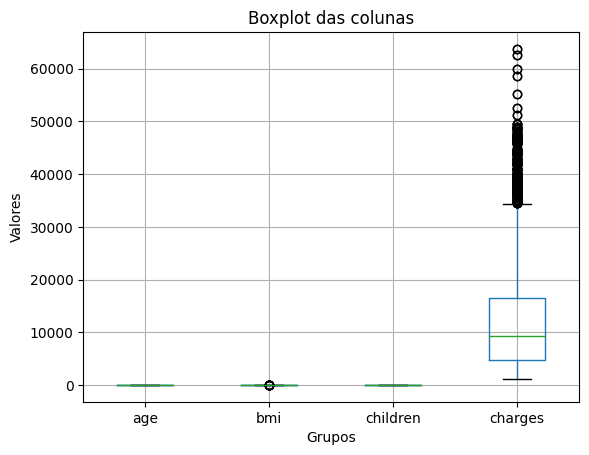

In [32]:
df_insurance.boxplot()
plt.title('Boxplot das colunas')
plt.xlabel('Grupos')
plt.ylabel('Valores')
plt.show()

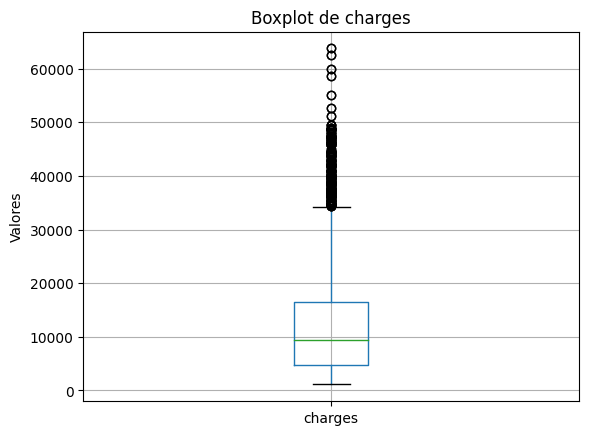

In [34]:
df_insurance.boxplot(column='charges')
plt.title('Boxplot de charges')
plt.ylabel('Valores')
plt.show()

In [35]:
def identificar_outliers(df, coluna):
    # Calculando o primeiro e terceiro quartis
    Q1 = df[coluna].quantile(0.25) #Primeiro Quartil
    Q3 = df[coluna].quantile(0.75) #Terceiro Quartil
    
    # Calculando o IQR (Intervalo Interquartil)
    IQR = Q3 - Q1
    
    # Calculando os limites superior e inferior para identificar os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Identificando outliers na coluna especificada
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    
    return outliers

In [36]:
#Exemplo de uso
outliers_encontrados = identificar_outliers(df_insurance,'charges')

In [37]:
outliers_encontrados

,age,sex,bmi,children,smoker,region,charges
14,27.0,male,42.13,0,yes,southeast,39611.7577
19,30.0,male,35.30,0,yes,southwest,36837.4670
23,34.0,female,31.92,1,yes,northeast,37701.8768
29,31.0,male,36.30,2,yes,southwest,38711.0000
30,22.0,male,35.60,0,yes,southwest,35585.5760
...,...,...,...,...,...,...,...
2735,52.0,male,41.80,2,yes,southeast,47269.8540
2736,64.0,male,36.96,2,yes,southeast,49577.6624
2744,32.0,male,33.63,1,yes,northeast,37607.5277
2764,22.0,female,31.02,3,yes,southeast,35595.5898


## Deletar informações de um DataFrame

Ao trabalhar com dados de uma base de clientes, pode ser necessário remover informações de clientes que não estão mais ativos na empresa.

Vimos como fazemos para remover dados faltantes. Mas, se por acaso, tivermos dados duplicados no dataset. O que fazer?

### **Método duplicated():**

o método ```duplicated()``` em Pandas é utilizado para identificar linhas duplicadas em um DataFrame.

Ele retorna uma série booleana que indica se cada linha é uma duplicata (ou seja, se aparece em uma linha anterior).

**Sintaxe:**

```DataFrame.duplicated(subset=None, keep='first')```

* subset (opcional): Permite especificar uma lista de colunas para verificar duplicatas apenas nessas colunas. Se não for fornecido, a verificação será em todas as colunas.

* keep (opcional): Define como marcar as duplicatas. Pode assumir três valores:
  * 'first' (padrão): Marca como True todas as ocorrências duplicadas, exceto a primeira.
  * 'last': Marca como True todas as ocorrências duplicadas, exceto a última False: Marca todas as ocorrências duplicadas como True.

In [38]:
df_insurance.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

In [40]:
df_insurance.duplicated(subset=['age'])

0       False
1       False
2       False
3       False
4       False
        ...  
2767     True
2768     True
2769     True
2770     True
2771     True
Length: 2772, dtype: bool

#Como ver isso como um DF?

In [39]:
df_insurance.loc[df_insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19.0,male,30.590,0,no,northwest,1639.56310
1338,23.0,male,34.400,0,no,southwest,1826.84300
1339,56.0,female,39.820,0,no,southeast,11090.71780
1340,27.0,male,42.130,0,yes,southeast,39611.75770
1341,19.0,male,24.600,1,no,southwest,1837.23700
...,...,...,...,...,...,...,...
2767,47.0,female,45.320,1,no,southeast,8569.86180
2768,21.0,female,34.600,0,no,southwest,2020.17700
2769,19.0,male,26.030,1,yes,northwest,16450.89470
2770,23.0,male,18.715,0,no,northwest,21595.38229


Como deletar os dados duplicados?

In [41]:
df_insurance.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


In [44]:
df_sem_duplicadas = df_insurance[~df_insurance.duplicated()]

In [45]:
df_sem_duplicadas

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500
